In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [12]:
wine.data.shape

(178, 13)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
x_train.shape

(124, 13)

### 訓練模型

In [30]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(x_train, y_train)
rfc = rfc.fit(x_train, y_train)

score_c = clf.score(x_test, y_test)
score_r = rfc.score(x_test, y_test)

In [31]:
print('Single tree:{}'.format(score_c),'Random Forest:{}'.format(score_r))

Single tree:0.9444444444444444 Random Forest:1.0


In [33]:
rfc.feature_importances_
rfc.apply(x_test)
rfc.predict(x_test)


array([2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0,
       1, 0, 2, 0, 1, 1, 0, 1, 0, 1])

### 交叉驗證

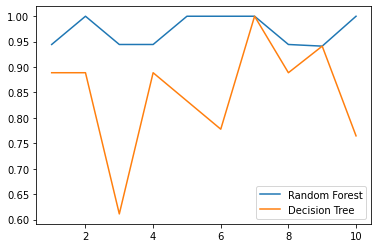

In [20]:
# 一次10組交叉驗證  比較決策樹根隨機森林
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1,11),rfc_s, label="Random Forest")
plt.plot(range(1,11),clf_s, label="Decision Tree")
plt.legend()
plt.show()

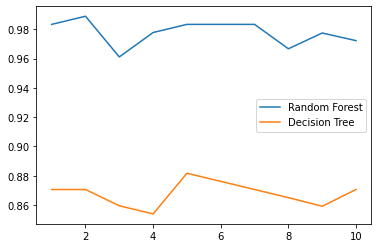

In [22]:
# 進行十次交叉驗證(每次取平均)
rfc_l =[]
clf_l =[]
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l, label="Random Forest")
plt.plot(range(1,11),clf_l, label="Decision Tree")
plt.legend()
plt.show()

### n_estimator 的學習曲線

0.9888888888888889 31


<function matplotlib.pyplot.show(*args, **kw)>

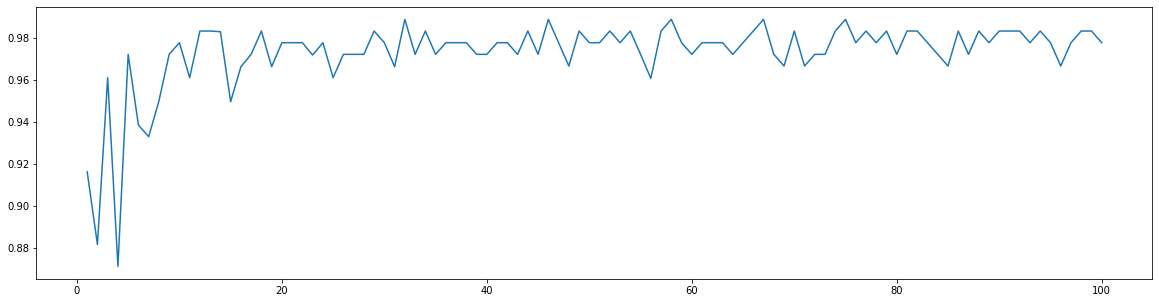

In [50]:
supera = []
for i in range(100):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    supera.append(rfc_s)
print(max(supera), supera.index(max(supera)))
plt.figure(figsize=[20,5])
plt.plot(range(1,101), supera)
plt.show

### 乳腺癌資料集實作

In [43]:
from sklearn.datasets import load_breast_cancer

In [48]:
data2 = load_breast_cancer()

In [49]:
data2.data.shape

(569, 30)

In [51]:
rfc = RandomForestClassifier(n_estimators=100, random_state=87)
score_pre = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
score_pre

0.9833333333333332